In [2]:
%pylab inline
import numpy as np
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=False)
rc('mathtext', fontset = 'stix')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
BIGGEST_SIZE = 16

rc('font', size=SMALL_SIZE)          # controls default text sizes
rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
rc('figure', titlesize=BIGGEST_SIZE) 
pk = {'color':'gray','lw':1, 'ls':'dotted'}

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as plb
import pandas as pd
from pylab import *
import scipy, astropy, os, radmc3dPy
from radmc3dPy import *

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.


In [4]:
pwd

'/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy'

# Functions for Sigma_0

In [5]:
def sigma(R, sig_0, rout=100, p=-1):
    return sig_0 * ((R/rout)**p)

def sigma_cutoff(R, sig_0, rout=60, p=-1):
    return sig_0 * ((R/rout)**p) * np.exp(-(R/rout)**(2+p))

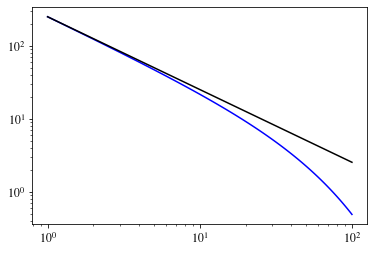

In [6]:
sig1AU = sigma_cutoff(1,4.3) 
sig100AU = sig1AU/100
R = np.linspace(1,100,100)

sig3 = sigma(R, sig100AU) # powerlaw model
sig1 = sigma_cutoff(R,4.3) # cutoff model

plt.plot(R, sig1, 'blue') # cutoff
plt.plot(R, sig3, 'black') # powerlaw
plt.xscale('log')
plt.yscale('log')

# Powerlaw Model

In [7]:
par = analyze.readParams()

In [8]:
# constant 
sigma_0 = sig100AU # setting r = r_c -> for SD at outer radius
    
# theoretical radius 
r_in_out = np.linspace(1, 100, 100)

# radius of the disk
r_out = radmc3dPy.params.rdisk/(1.496*(10**13)) # 100 AU

# surface density power law
p = radmc3dPy.params.plsig1 # -1.0

In [9]:
sigma_r = sigma_0 * (r_in_out/r_out)**p

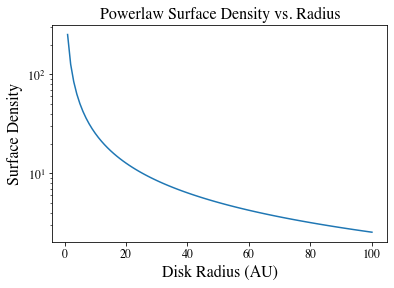

In [10]:
plt.xlabel("Disk Radius (AU)")
plt.ylabel("Surface Density")
plt.title('Powerlaw Surface Density vs. Radius')
plt.plot(r_in_out, sigma_r)
plt.yscale('log')

# Cutoff Model

In [11]:
# constant 
sigma_0_effects = 4.3 # g /cm^2

# theoretical radius 
r_in_out2 = np.linspace(1, 100, 100)

# radius of the cutoff
r_c = 60 # AU

# surface density power law
p1 = 1.0

In [12]:
cutoff_r = sigma_0_effects * ((r_in_out2/r_c)**-p1) * (np.e**(-(r_in_out2/r_c)**(2-p1)))

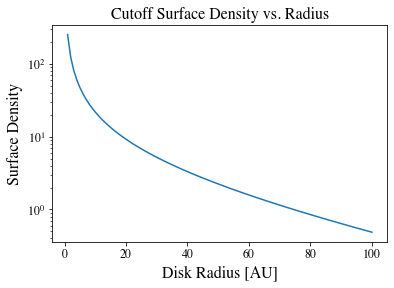

In [13]:
plt.xlabel("Disk Radius [AU]")
plt.ylabel("Surface Density")
plt.title('Cutoff Surface Density vs. Radius')
plt.plot(r_in_out2, cutoff_r)
plt.yscale('log')

# Gap function

In [14]:
def gap(minr, maxr, sigma, color): # plotting a gap
    R = np.linspace(minr,maxr,100) 
    i1 = np.where(R<40)
    i2 = np.where(R>10)
    itot = np.intersect1d(i1,i2)
    sigma[itot] *= 10**-5
    
    plt.loglog(R, sigma, '.-', color=color)
    plt.xlabel('Disk Radius [AU]')
    plt.ylabel('Surface Density [$g/cm^2$]')
    plt.title('Mass/Unit Area vs. Radius')

In [15]:
#gap(1, 100, sigma_r) # ppdisk - powerlaw

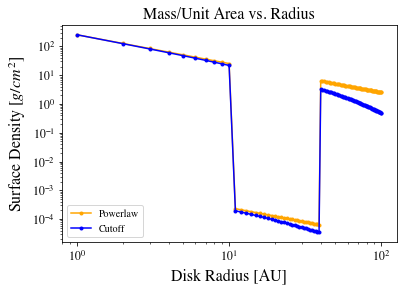

In [16]:
gap(1, 100, sigma_r, color='orange') # powerlaw
gap(1, 100, cutoff_r, color='blue') # cutoff
legend_drawn_flag = True
plt.legend(["Powerlaw", "Cutoff"], loc='lower left', frameon=legend_drawn_flag)
plb.savefig('/Users/Maya/Desktop/amnh_images/surface_density.png', dpi=500, bbox_inches='tight')

# On the same plot

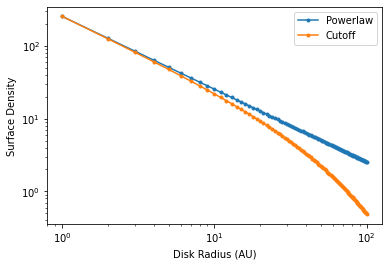

In [119]:
plt.plot(r_in_out, sigma_r, '.-', label='Powerlaw')
plt.plot(r_in_out2, effects_r, '.-', label='Cutoff')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Disk Radius (AU)")
plt.ylabel("Surface Density")
plt.legend()

Notes:

- Small-scale emission features (?) (substructures) are found at effectively any disk radius, from 5 au out to more than 150 au.
- Typical values of the mass accretion rates are in the range 1 × 10−11–1 × 10−7 (Gullbring et al., 1998).
- For high accretion rates (M>10−8M⊙/year) they found that the inner gas disk becomes optically thick (this topic may need to be revisited)
- Spiral disks as substructures
